In [18]:
import os
from skimage.io import imread, imshow
import tensorflow as tf
from preprocessing.preprocessing_factory import get_preprocessing
from nets import nets_factory
%matplotlib inline  

In [4]:
img_dir = '../distracted-driver-detection/test'

In [6]:
img_paths = os.listdir(img_dir)

In [22]:
MODEL = 'resnet_v2_50'

img shape: (480, 640, 3)


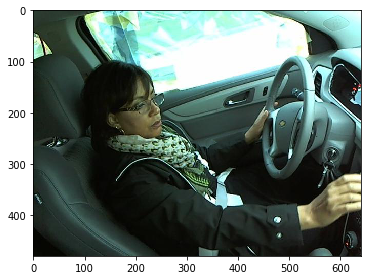

In [11]:
img_sample_path = img_dir + '/' + img_paths[0]
img_sample = imread(img_sample_path)
print('img shape: {}'.format(img_sample.shape))
imshow(img_sample)


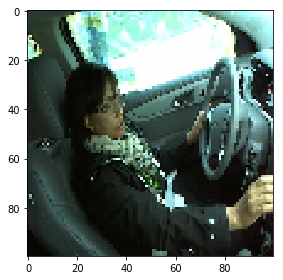

In [17]:
img_4 = tf.expand_dims(img_sample, 0)
img_resize = tf.image.resize_nearest_neighbor(img_4, [100, 100])
img_resize_raw = tf.squeeze(img_resize)

with tf.Session() as sess:
    img_raw = sess.run(img_resize_raw)
    imshow(img_raw)

In [53]:
def test_preprocessing(img_path, MODEL, num_classes):
    model_ = nets_factory.get_network_fn(MODEL, num_classes, is_training=False)
    img_size = model_.default_image_size
    preprocessing_fn = get_preprocessing(MODEL, is_training=False)
    img_raw = imread(img_path)
    img = preprocessing_fn(img_raw, img_size, img_size)
    img = tf.expand_dims(img, 0)
    return img, img_raw

TensorShape([Dimension(1), Dimension(224), Dimension(224), Dimension(3)])

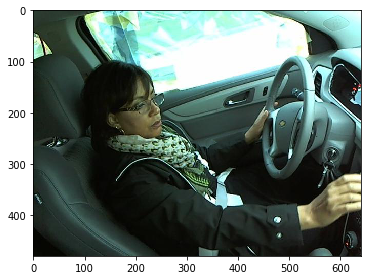

In [54]:
img_pp, img_raw = test_preprocessing(img_sample_path, MODEL, 10)
imshow(img_raw)
img_pp.shape

In [55]:
def test_batch(img_dir, MODEL, num_classes):
    for img in os.listdir(img_dir):
        img_path = img_dir + '/' + img
        img_pp, img_raw = test_preprocessing(img_path, MODEL, num_classes)
        yield img_pp, img_raw

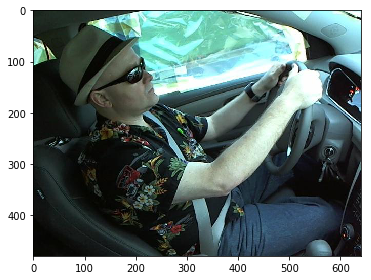

In [50]:
i = 0
imgs = []
for img_sample, img_raw in test_batch(img_dir, MODEL, 10):
    if i < 3:
        imgs.append(img_raw)
        i += 1
    else:
        break

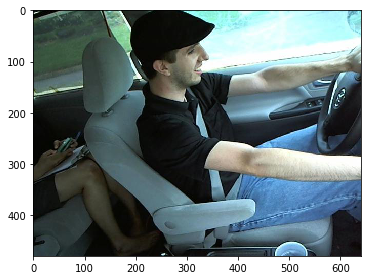

In [52]:
j = 0
for img in os.listdir(img_dir):
    if j < 2:
        img_path = img_dir + '/' + img
        img_pp, img_raw = test_preprocessing(img_path, MODEL, 10)
        imshow(img_raw)
        j += 1
    else:
        break
    

In [57]:
import math
import numpy as np

In [61]:
img_names = []
for path in img_paths:
    img_name = img_dir + '/' + path
    img_names.append(img_name)

In [ ]:
def _convert_dataset(split_name, filenames, class_names_to_ids, dataset_dir, tfrecord_filename, _NUM_SHARDS):
  """Converts the given filenames to a TFRecord dataset.
  Args:
    split_name: The name of the dataset, either 'train' or 'validation'.
    filenames: A list of absolute paths to png or jpg images.
    class_names_to_ids: A dictionary from class names (strings) to ids
      (integers).
    dataset_dir: The directory where the converted datasets are stored.
  """
  assert split_name in ['train', 'validation', 'test']

  num_per_shard = int(math.ceil(len(filenames) / float(_NUM_SHARDS)))

  with tf.Graph().as_default():
    image_reader = ImageReader()

    with tf.Session('') as sess:

      for shard_id in range(_NUM_SHARDS):
        output_filename = _get_dataset_filename(
            dataset_dir, split_name, shard_id, tfrecord_filename = tfrecord_filename, _NUM_SHARDS = _NUM_SHARDS)

        with tf.python_io.TFRecordWriter(output_filename) as tfrecord_writer:
          start_ndx = shard_id * num_per_shard
          end_ndx = min((shard_id+1) * num_per_shard, len(filenames))
          for i in range(start_ndx, end_ndx):
            sys.stdout.write('\r>> Converting image %d/%d shard %d' % (
                i+1, len(filenames), shard_id))
            sys.stdout.flush()

            # Read the filename:
            image_data = tf.gfile.FastGFile(filenames[i], 'rb').read()
            height, width = image_reader.read_image_dims(sess, image_data)
            
            if split_name != 'test':
                class_name = os.path.basename(os.path.dirname(filenames[i]))
                class_id = class_names_to_ids[class_name]

                example = image_to_tfexample(
                    image_data, 'jpg'.encode(), height, width, class_id)
                tfrecord_writer.write(example.SerializeToString())
            else:
                example = image_to_tfexample(
                    image_data, 'jpg'.encode(), height, width)
                tfrecord_writer.write(example.SerializeToString())
                

  sys.stdout.write('\n')
  sys.stdout.flush()


In [63]:
a = 'test'
a != 'test'

False